In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random
from scipy.stats import norm

In [14]:
# Black-Scholes portfolio value estimation:
# Setup the strike price of "long 1-yr put" = A;
# Setup the strike price of "long 1-yr call" = B;
# Assume the price of the underlying asset = C;
# And preset the volatility = 20%, rate = 11/12, dividend yield = 0%;
# For desmonstration use, set A=80, B=120, C=100
# Then we'd have:

def BSCallPricing(S, K, T, sigma, r, q):
    d1 = (np.log(S/K)+(r-q+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S/K)+(r-q-(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    return(S*np.exp(-q*T)*N_d1 - K*np.exp(-r*T)*N_d2)
def BSPutPricing(S, K, T, sigma, r, q):
    d1 = (np.log(S/K)+(r-q+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S/K)+(r-q-(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    Nd1 = 1-norm.cdf(d1)
    Nd2 = 1-norm.cdf(d2)
    return(K*np.exp(-r*T)*Nd2-S*np.exp(-q*T)*Nd1)
BSCallPricing(100,120, 1, 0.2, 0.01, 0) + BSPutPricing(100,80, 1, 0.2, 0.01, 0)
print("The value of the portfolio is " + str(BSCallPricing(100,120, 1, 0.2, 0.01, 0) + BSPutPricing(100,80, 1, 0.2, 0.01, 0)))

The value of the portfolio is 3.407942588596672


The maximum gain that the trader could incur in a month is 20.07933624986768


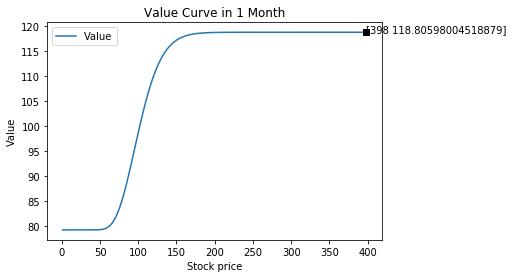

In [17]:
# Maximum gain and loss estimation:
# Setup the strike price of "long 1-yr put" = A;
# Setup the strike price of "short 1-yr call" = B;
# Assume the price of underlying asset = C;
# And preset the volatility = 20%, rate = 1, dividend yield = 0%;
# For desmonstration use, set A=80, B=120, C=100
# Then we'd have:

value = []
for S in range(1,400):
    value += [-BSCallPricing(S, 120, 1, 0.2, 0.01, 0)+BSPutPricing(S,80, 1, 0.2, 0.01, 0)+S]

plt.plot(range(1,400),value)
plt.title('Value Curve in 1 Month')
plt.legend(['Value'])
plt.ylabel('Value')
plt.xlabel('Stock price')

max_indx=np.argmax(value)
plt.plot(max_indx,value[max_indx],'ks')
show_max='['+str(max_indx)+' '+str(value[max_indx])+']'
plt.annotate(show_max,xytext=(max_indx,value[max_indx]),xy=(max_indx,value[max_indx]))
print("The maximum gain that the trader could incur in a month is " +str((value[max_indx])+BSCallPricing(100,120,1, 0.2, 0.01, 0) - BSPutPricing(100,80, 1, 0.2, 0.01, 0)-100))

The maximum loss that the trader could incur in a month is -19.52265709538767


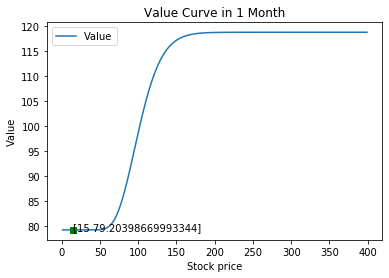

In [18]:
# Maximum gain and loss estimation:
# Setup the strike price of "long 1-yr put" = A;
# Setup the strike price of "short 1-yr call" = B;
# Assume the price of underlying asset = C;
# And preset the volatility = 20%, rate = 1, dividend yield = 0%;
# For desmonstration use, set A=80, B=120, C=100
# Then we'd have:

plt.plot(range(1,400),value)
plt.title('Value Curve in 1 Month')
plt.legend(['Value'])
plt.ylabel('Value')
plt.xlabel('Stock price')

min_indx=np.argmin(value)
plt.plot(min_indx,value[min_indx],'gs')
show_min='['+str(min_indx)+' '+str(value[min_indx])+']'
plt.annotate(show_min,xytext=(min_indx,value[min_indx]),xy=(min_indx,value[min_indx]))
print("The maximum loss that the trader could incur in a month is " + str((value[min_indx])+ BSCallPricing(100,120,1, 0.2, 0.01, 0) - BSPutPricing(100,80, 1, 0.2, 0.01, 0)-100))